In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [576]:
df = pd.read_csv('loan_train.csv')

In [578]:
df

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [580]:
#Checking for any missing values within the dataset
df.isna()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
341,False,False,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False,False,False
343,False,False,False,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False,False,False,False


In [582]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [584]:
#Looking after how many rows and columns that exist within the dataset
df.shape

(346, 10)

In [586]:
#It seems like the first two columns are not needed as they do not contain meaningful information
#The best thing would be to drop these columns
#Looking first if they do not really contain useful information

print(df[['Unnamed: 0.1', 'Unnamed: 0']])

     Unnamed: 0.1  Unnamed: 0
0               0           0
1               2           2
2               3           3
3               4           4
4               6           6
..            ...         ...
341           394         394
342           395         395
343           397         397
344           398         398
345           399         399

[346 rows x 2 columns]


In [588]:
#Dropping the columns
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [590]:
#Checking to see if it has been applied
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [592]:
#Renaming some columns so they are equal, all in lower case etc
df.rename(columns = {
    'Principal': 'principal',
    'Gender': 'gender'
                    }, inplace = True)

In [594]:
df

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [596]:
#looks like there is a misspelling on 'Bachelor', taking look after more misspells
print(df.to_string())

    loan_status  principal  terms effective_date    due_date  age             education  gender
0       PAIDOFF       1000     30       9/8/2016   10/7/2016   45  High School or Below    male
1       PAIDOFF       1000     30       9/8/2016   10/7/2016   33              Bechalor  female
2       PAIDOFF       1000     15       9/8/2016   9/22/2016   27               college    male
3       PAIDOFF       1000     30       9/9/2016   10/8/2016   28               college  female
4       PAIDOFF       1000     30       9/9/2016   10/8/2016   29               college    male
5       PAIDOFF       1000     30       9/9/2016   10/8/2016   36               college    male
6       PAIDOFF       1000     30       9/9/2016   10/8/2016   28               college    male
7       PAIDOFF        800     15      9/10/2016   9/24/2016   26               college    male
8       PAIDOFF        300      7      9/10/2016   9/16/2016   29               college    male
9       PAIDOFF       1000     15      9

In [488]:
#Checking to see if 'Bachelor' is in the dataset
def find_correct_spells():
    if 'Bachelor' in df['education']:
        print('Bachelor exist within the dataset')
    else: 
        print('Bachelor could not be found within the dataset')

find_correct_spells()

Bachelor could not be found within the dataset


In [598]:
#Renaming Bechalor to bachelor
df['education'] = df['education'].replace('Bechalor', 'Bachelor')
df['education'] = df['education'].replace('college', 'College')

#Capitalizing the first letter in gender, and removing the capitalized word within loan status
df['gender'] = df['gender'].str.capitalize()
df['loan_status'] = df['loan_status'].str.title()

In [600]:
df

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,Paidoff,1000,30,9/8/2016,10/7/2016,45,High School or Below,Male
1,Paidoff,1000,30,9/8/2016,10/7/2016,33,Bachelor,Female
2,Paidoff,1000,15,9/8/2016,9/22/2016,27,College,Male
3,Paidoff,1000,30,9/9/2016,10/8/2016,28,College,Female
4,Paidoff,1000,30,9/9/2016,10/8/2016,29,College,Male
...,...,...,...,...,...,...,...,...
341,Collection,800,15,9/11/2016,9/25/2016,32,High School or Below,Male
342,Collection,1000,30,9/11/2016,10/10/2016,25,High School or Below,Male
343,Collection,800,15,9/12/2016,9/26/2016,39,College,Male
344,Collection,1000,30,9/12/2016,11/10/2016,28,College,Male


In [602]:
#Converting format on effective date
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [604]:
#Converting format on due date
df['due_date'] = pd.to_datetime(df['due_date'])

In [606]:
#Checking to see if there are any duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
341    False
342     True
343    False
344    False
345    False
Length: 346, dtype: bool

In [504]:
#Checking to see how many duplicates there are
df.duplicated().sum()

40

In [608]:
#Dropping the duplicates
df = df.drop_duplicates()

# Exploratory Data Analysis

In [610]:
df.head(15)

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,Paidoff,1000,30,2016-09-08,2016-10-07,45,High School or Below,Male
1,Paidoff,1000,30,2016-09-08,2016-10-07,33,Bachelor,Female
2,Paidoff,1000,15,2016-09-08,2016-09-22,27,College,Male
3,Paidoff,1000,30,2016-09-09,2016-10-08,28,College,Female
4,Paidoff,1000,30,2016-09-09,2016-10-08,29,College,Male
5,Paidoff,1000,30,2016-09-09,2016-10-08,36,College,Male
6,Paidoff,1000,30,2016-09-09,2016-10-08,28,College,Male
7,Paidoff,800,15,2016-09-10,2016-09-24,26,College,Male
8,Paidoff,300,7,2016-09-10,2016-09-16,29,College,Male
9,Paidoff,1000,15,2016-09-10,2016-10-09,39,High School or Below,Male


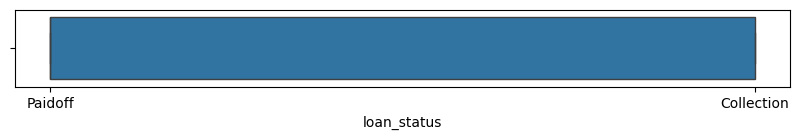

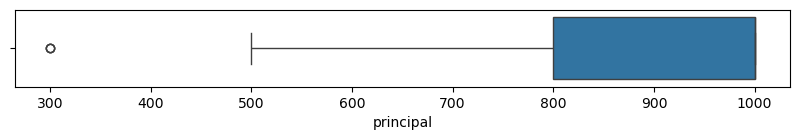

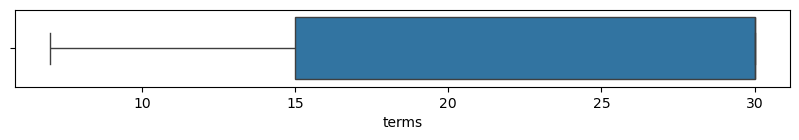

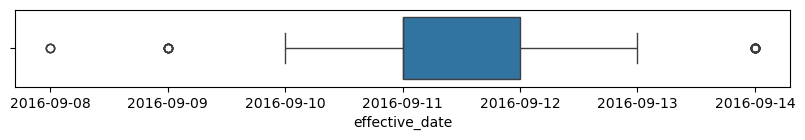

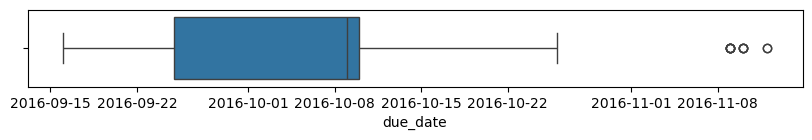

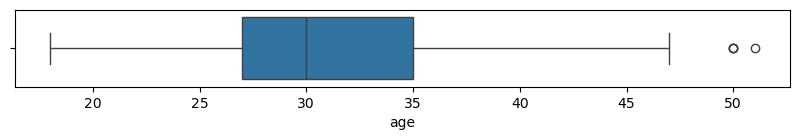

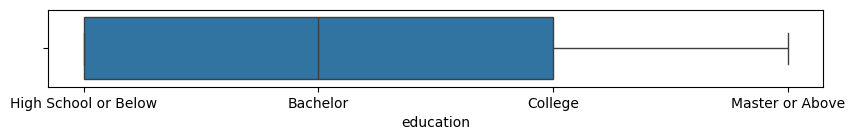

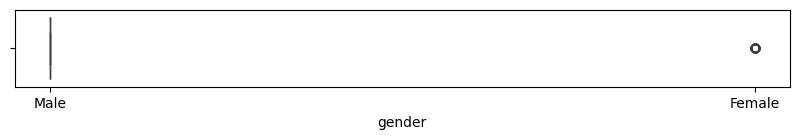

In [510]:
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'loan_status')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'principal')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'terms')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'effective_date')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'due_date')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'age')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'education')
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'gender')
plt.show()

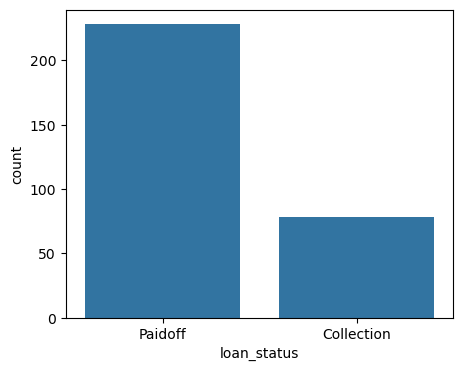

In [512]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'loan_status', data = df)
plt.show()

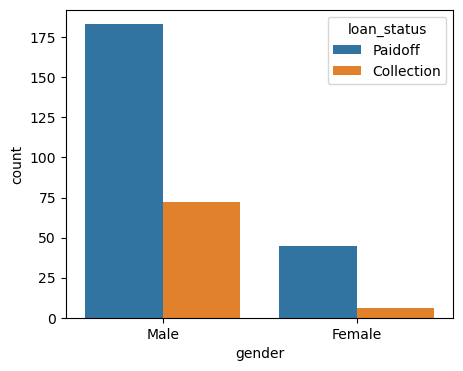

In [514]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'gender', hue = 'loan_status', data = df)
plt.show()

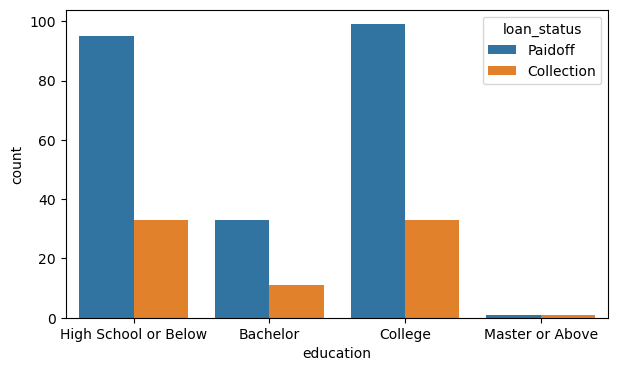

In [516]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'education', hue = 'loan_status', data = df)
plt.show()

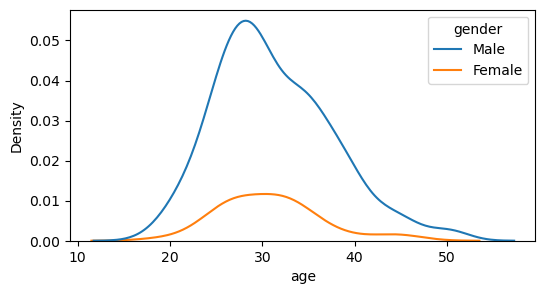

In [518]:
plt.figure(figsize = (6,3))
sns.kdeplot(x = 'age', hue = 'gender', data = df)
plt.show()

C:\Users\WhyWh\AppData\Local\Temp\ipykernel_28856\3747684555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_of_loan'] = (df['due_date'] - df['effective_date']).dt.days


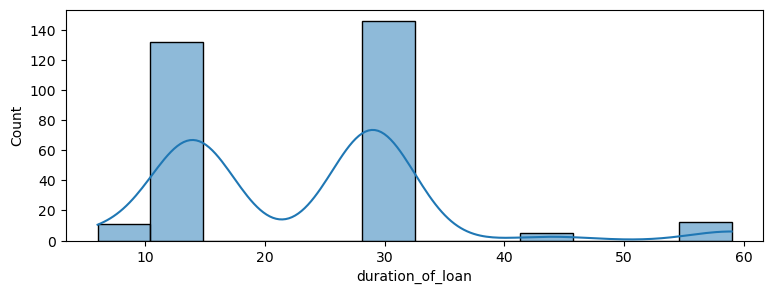

In [612]:
#Calculating duration of the loans from the effective date to the date the loan is to be due
plt.figure(figsize = (9,3))
df['duration_of_loan'] = (df['due_date'] - df['effective_date']).dt.days
sns.histplot(df['duration_of_loan'], kde = True)
plt.show()

In [614]:
df[df['duration_of_loan'] <30].shape

(289, 9)

In [616]:
df[df['duration_of_loan'] >=30].shape

(17, 9)

In [528]:
df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender,duration_of_loan
0,Paidoff,1000,30,2016-09-08,2016-10-07,45,High School or Below,Male,29
1,Paidoff,1000,30,2016-09-08,2016-10-07,33,Bachelor,Female,29
2,Paidoff,1000,15,2016-09-08,2016-09-22,27,College,Male,14
3,Paidoff,1000,30,2016-09-09,2016-10-08,28,College,Female,29
4,Paidoff,1000,30,2016-09-09,2016-10-08,29,College,Male,29


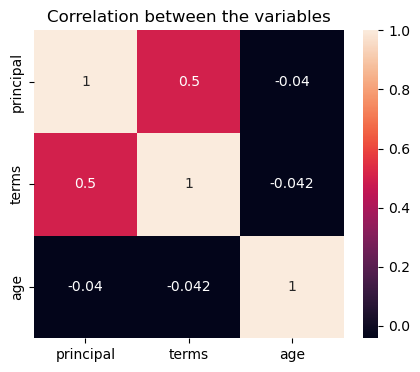

In [532]:
#Visualizing the correlation between the variables within the dataset
plt.figure(figsize = (5,4))
sns.heatmap(df[['principal', 'terms', 'age']].corr().round(3), annot = True)
plt.title('Correlation between the variables')
plt.show()

# Preprocessing

### Label Encoding

In [618]:
#Importing LabelEncoding
#for the column (loan_status)
#Output:
#1 = Paidoff
#0 = Collection
from sklearn.preprocessing import LabelEncoder

In [620]:
enc_lab = LabelEncoder()

In [622]:
df['loan_status'] = enc_lab.fit_transform(df['loan_status'])

C:\Users\WhyWh\AppData\Local\Temp\ipykernel_28856\922281453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = enc_lab.fit_transform(df['loan_status'])


In [624]:
df

,loan_status,principal,terms,effective_date,due_date,age,education,gender,duration_of_loan
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,Male,29
1,1,1000,30,2016-09-08,2016-10-07,33,Bachelor,Female,29
2,1,1000,15,2016-09-08,2016-09-22,27,College,Male,14
3,1,1000,30,2016-09-09,2016-10-08,28,College,Female,29
4,1,1000,30,2016-09-09,2016-10-08,29,College,Male,29
...,...,...,...,...,...,...,...,...,...
340,0,1000,30,2016-09-11,2016-11-09,26,College,Male,59
341,0,800,15,2016-09-11,2016-09-25,32,High School or Below,Male,14
343,0,800,15,2016-09-12,2016-09-26,39,College,Male,14
344,0,1000,30,2016-09-12,2016-11-10,28,College,Male,59


### One Hot Encoder

In [626]:
#Importing OneHotEncoder for nominal data within categorical variables
#for the columns (gender)
#1.0, and 0.0 for female and male
from sklearn.preprocessing import OneHotEncoder

In [628]:
enc_onh = OneHotEncoder(sparse_output = False).set_output(transform = 'pandas')

In [630]:
enc_onh_transform = enc_onh.fit_transform(df[['gender']])

In [632]:
df = pd.concat([df, enc_onh_transform], axis = 1)

In [634]:
df

,loan_status,principal,terms,effective_date,due_date,age,education,gender,duration_of_loan,gender_Female,gender_Male
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,Male,29,0.0,1.0
1,1,1000,30,2016-09-08,2016-10-07,33,Bachelor,Female,29,1.0,0.0
2,1,1000,15,2016-09-08,2016-09-22,27,College,Male,14,0.0,1.0
3,1,1000,30,2016-09-09,2016-10-08,28,College,Female,29,1.0,0.0
4,1,1000,30,2016-09-09,2016-10-08,29,College,Male,29,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
340,0,1000,30,2016-09-11,2016-11-09,26,College,Male,59,0.0,1.0
341,0,800,15,2016-09-11,2016-09-25,32,High School or Below,Male,14,0.0,1.0
343,0,800,15,2016-09-12,2016-09-26,39,College,Male,14,0.0,1.0
344,0,1000,30,2016-09-12,2016-11-10,28,College,Male,59,0.0,1.0


### Ordinal Encoder

In [636]:
#Importing OrdinalEncoder for ordinal data within categorical variables
#for the columns (education), and also setting the order of the categories
#0.0 = High School or Below
#1.0 = College
#2.0 = Bachelor
#3.0 = Master or Above
from sklearn.preprocessing import OrdinalEncoder

In [638]:
enc_ord = OrdinalEncoder(categories = [['High School or Below', 'College', 'Bachelor', 'Master or Above']])

In [640]:
df['education'] = enc_ord.fit_transform(df[['education']])

In [642]:
df

,loan_status,principal,terms,effective_date,due_date,age,education,gender,duration_of_loan,gender_Female,gender_Male
0,1,1000,30,2016-09-08,2016-10-07,45,0.0,Male,29,0.0,1.0
1,1,1000,30,2016-09-08,2016-10-07,33,2.0,Female,29,1.0,0.0
2,1,1000,15,2016-09-08,2016-09-22,27,1.0,Male,14,0.0,1.0
3,1,1000,30,2016-09-09,2016-10-08,28,1.0,Female,29,1.0,0.0
4,1,1000,30,2016-09-09,2016-10-08,29,1.0,Male,29,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
340,0,1000,30,2016-09-11,2016-11-09,26,1.0,Male,59,0.0,1.0
341,0,800,15,2016-09-11,2016-09-25,32,0.0,Male,14,0.0,1.0
343,0,800,15,2016-09-12,2016-09-26,39,1.0,Male,14,0.0,1.0
344,0,1000,30,2016-09-12,2016-11-10,28,1.0,Male,59,0.0,1.0


In [560]:
#Converting the datetime which has a timestamp value into numerical before train/test and scaling

In [644]:
df['effective_date_year'] = df['effective_date'].dt.year
df['effective_date_month'] = df['effective_date'].dt.month
df['effective_date_day'] = df['effective_date'].dt.day

df['due_date_year'] = df['effective_date'].dt.year
df['due_date_month'] = df['effective_date'].dt.month
df['due_date_day'] = df['effective_date'].dt.day

In [646]:
#Dropping categorical columns that have been encoded
df = df.drop(['effective_date', 'due_date', 'gender', 'duration_of_loan'], axis = 1)

In [648]:
X = df.iloc[:,1:13]

y = df.iloc[:,0]

In [650]:
X.head()

,principal,terms,age,education,gender_Female,gender_Male,effective_date_year,effective_date_month,effective_date_day,due_date_year,due_date_month,due_date_day
0,1000,30,45,0.0,0.0,1.0,2016,9,8,2016,9,8
1,1000,30,33,2.0,1.0,0.0,2016,9,8,2016,9,8
2,1000,15,27,1.0,0.0,1.0,2016,9,8,2016,9,8
3,1000,30,28,1.0,1.0,0.0,2016,9,9,2016,9,9
4,1000,30,29,1.0,0.0,1.0,2016,9,9,2016,9,9


In [652]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int32

In [654]:
df

,loan_status,principal,terms,age,education,gender_Female,gender_Male,effective_date_year,effective_date_month,effective_date_day,due_date_year,due_date_month,due_date_day
0,1,1000,30,45,0.0,0.0,1.0,2016,9,8,2016,9,8
1,1,1000,30,33,2.0,1.0,0.0,2016,9,8,2016,9,8
2,1,1000,15,27,1.0,0.0,1.0,2016,9,8,2016,9,8
3,1,1000,30,28,1.0,1.0,0.0,2016,9,9,2016,9,9
4,1,1000,30,29,1.0,0.0,1.0,2016,9,9,2016,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1000,30,26,1.0,0.0,1.0,2016,9,11,2016,9,11
341,0,800,15,32,0.0,0.0,1.0,2016,9,11,2016,9,11
343,0,800,15,39,1.0,0.0,1.0,2016,9,12,2016,9,12
344,0,1000,30,28,1.0,0.0,1.0,2016,9,12,2016,9,12


In [662]:
#Train test splitting the dataset
from sklearn.model_selection import train_test_split

In [664]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 19)

In [666]:
#Checking the shapes of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(244, 12)
(62, 12)
(244,)
(62,)


In [668]:
X_train.describe()

,principal,terms,age,education,gender_Female,gender_Male,effective_date_year,effective_date_month,effective_date_day,due_date_year,due_date_month,due_date_day
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0,244.0,244.000000,244.0,244.0,244.000000
mean,939.754098,22.233607,31.135246,0.729508,0.176230,0.823770,2016.0,9.0,11.557377,2016.0,9.0,11.557377
std,111.930042,7.998890,5.956819,0.737440,0.381798,0.381798,0.0,0.0,1.183210,0.0,0.0,1.183210
min,300.000000,7.000000,19.000000,0.000000,0.000000,0.000000,2016.0,9.0,8.000000,2016.0,9.0,8.000000
25%,800.000000,15.000000,27.000000,0.000000,0.000000,1.000000,2016.0,9.0,11.000000,2016.0,9.0,11.000000
50%,1000.000000,30.000000,30.000000,1.000000,0.000000,1.000000,2016.0,9.0,11.000000,2016.0,9.0,11.000000
75%,1000.000000,30.000000,35.000000,1.000000,0.000000,1.000000,2016.0,9.0,12.000000,2016.0,9.0,12.000000
max,1000.000000,30.000000,51.000000,3.000000,1.000000,1.000000,2016.0,9.0,14.000000,2016.0,9.0,14.000000


In [670]:
X_test.describe()

,principal,terms,age,education,gender_Female,gender_Male,effective_date_year,effective_date_month,effective_date_day,due_date_year,due_date_month,due_date_day
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.000000,62.0,62.0,62.000000
mean,941.935484,21.983871,31.354839,0.774194,0.129032,0.870968,2016.0,9.0,11.241935,2016.0,9.0,11.241935
std,118.111349,8.304634,7.094437,0.663309,0.337972,0.337972,0.0,0.0,1.196792,0.0,0.0,1.196792
min,300.000000,7.000000,18.000000,0.000000,0.000000,0.000000,2016.0,9.0,8.000000,2016.0,9.0,8.000000
25%,925.000000,15.000000,27.000000,0.000000,0.000000,1.000000,2016.0,9.0,11.000000,2016.0,9.0,11.000000
50%,1000.000000,22.500000,30.000000,1.000000,0.000000,1.000000,2016.0,9.0,11.000000,2016.0,9.0,11.000000
75%,1000.000000,30.000000,35.750000,1.000000,0.000000,1.000000,2016.0,9.0,12.000000,2016.0,9.0,12.000000
max,1000.000000,30.000000,47.000000,2.000000,1.000000,1.000000,2016.0,9.0,14.000000,2016.0,9.0,14.000000


In [672]:
y_train.describe()

count    244.000000
mean       0.741803
std        0.438542
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: loan_status, dtype: float64

In [674]:
y_test.describe()

count    62.000000
mean      0.758065
std       0.431751
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: loan_status, dtype: float64

In [678]:
#Importing the StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

In [680]:
stanscal = StandardScaler()

In [682]:
X_train = stanscal.fit_transform(X_train)

In [684]:
X_test = stanscal.transform(X_test)

# Model selection and evaluation

In [686]:
#Importing the necessary models from the Scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Training the selected classification models

## Logistic Regression

In [688]:
lr = LogisticRegression()

In [690]:
lr.fit(X_train, y_train)

LogisticRegression()

In [692]:
y_pred_lr = lr.predict(X_test)

In [694]:
lr.score(X_test, y_test)

0.6774193548387096

## KNN

In [696]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [698]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [700]:
y_pred_knn = knn.predict(X_test)

In [702]:
knn.score(X_test, y_test)

0.6774193548387096

## Decision Tree

In [704]:
dtr = DecisionTreeClassifier()

In [706]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [708]:
y_pred_dtr = dtr.predict(X_test)

In [710]:
dtr.score(X_test, y_test)

0.5967741935483871

## Support Vector Machine

In [712]:
svcl = SVC()

In [714]:
svcl.fit(X_train, y_train)

SVC()

In [716]:
y_pred_svcl = svcl.predict(X_test)

In [718]:
svcl.score(X_test, y_test)

0.6935483870967742

## Performance evaluation

In [722]:
#Importing needed metrics to evaluate the models' scores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [724]:
y_pred_lr = lr.predict(X_test)
conmax_lr = confusion_matrix(y_test, y_pred_lr)

In [726]:
y_pred_knn = knn.predict(X_test)
conmax_knn = confusion_matrix(y_test, y_pred_knn)

In [728]:
y_pred_dtr = dtr.predict(X_test)
conmax_dtr = confusion_matrix(y_test, y_pred_dtr)

In [730]:
y_pred_svcl = svcl.predict(X_test)
conmax_svcl = confusion_matrix(y_test, y_pred_svcl)

In [732]:
print(f'Confusion Matrix for Logistic Regression: \n {conmax_lr}\n')
print(f'Confusion Matrix for KNN: \n {conmax_knn}\n')
print(f'Confusion Matrix for Decision Tree: \n {conmax_dtr}\n')
print(f'Confusion Matrix for Support Vector Machine: \n {conmax_svcl}\n')

Confusion Matrix for Logistic Regression: 
 [[ 3 12]
 [ 8 39]]

Confusion Matrix for KNN: 
 [[ 6  9]
 [11 36]]

Confusion Matrix for Decision Tree: 
 [[ 4 11]
 [14 33]]

Confusion Matrix for Support Vector Machine: 
 [[ 2 13]
 [ 6 41]]



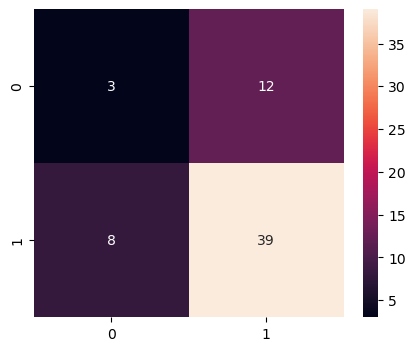

In [734]:
plt.figure(figsize = (5,4))
sns.heatmap(conmax_lr, annot = True)
plt.show()

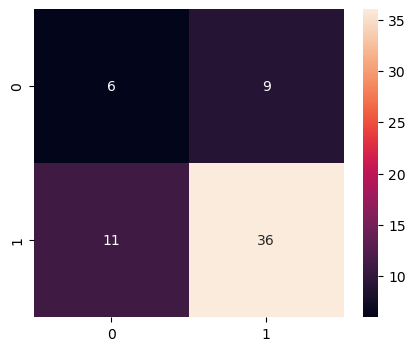

In [736]:
plt.figure(figsize = (5,4))
sns.heatmap(conmax_knn, annot = True)
plt.show()

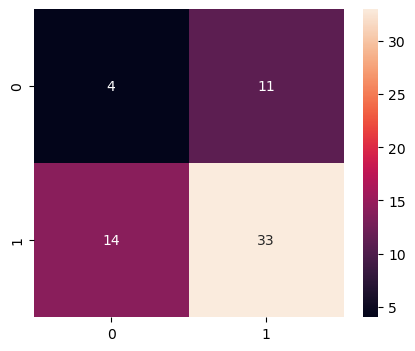

In [738]:
plt.figure(figsize = (5,4))
sns.heatmap(conmax_dtr, annot = True)
plt.show()

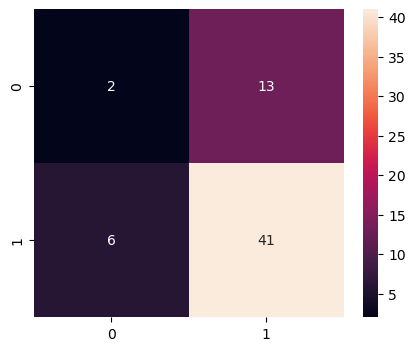

In [740]:
plt.figure(figsize = (5,4))
sns.heatmap(conmax_svcl, annot = True)
plt.show()

In [742]:
print(f'Logistic Regression Performance: \n {classification_report(y_test, y_pred_lr)}')

Logistic Regression Performance: 
               precision    recall  f1-score   support

           0       0.27      0.20      0.23        15
           1       0.76      0.83      0.80        47

    accuracy                           0.68        62
   macro avg       0.52      0.51      0.51        62
weighted avg       0.65      0.68      0.66        62



In [744]:
print(f'KNN Performance: \n {classification_report(y_test, y_pred_knn)}')

KNN Performance: 
               precision    recall  f1-score   support

           0       0.35      0.40      0.38        15
           1       0.80      0.77      0.78        47

    accuracy                           0.68        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.69      0.68      0.68        62



In [746]:
print(f'Decision Tree Performance: \n {classification_report(y_test, y_pred_dtr)}')

Decision Tree Performance: 
               precision    recall  f1-score   support

           0       0.22      0.27      0.24        15
           1       0.75      0.70      0.73        47

    accuracy                           0.60        62
   macro avg       0.49      0.48      0.48        62
weighted avg       0.62      0.60      0.61        62



In [748]:
print(f'Support Vector Machine Performance: \n {classification_report(y_test, y_pred_svcl)}')

Support Vector Machine Performance: 
               precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.76      0.87      0.81        47

    accuracy                           0.69        62
   macro avg       0.50      0.50      0.49        62
weighted avg       0.64      0.69      0.66        62



## Hyperparameter tuning for each model

In [754]:
#Checking which parameters that exist within each model, and adjusting with hyperparameters

In [756]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [758]:
#Logistic Regression
param_grid_lr = [{
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'] 
}]

In [760]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [762]:
#KNN
param_grid_knn = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [10, 15, 20, 25],
}]

In [764]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [766]:
#Decision Trees
param_grid_dtr = [{
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [None, 5, 10, 15, 20, 25]
}]

In [768]:
svcl.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [770]:
#Super Vector Machine
param_grid_svcl = [{
    'kernel': ['rbf', 'linear'],
    'C': [1.0, 10.0, 15.0]
}]

In [772]:
#Importing the cross validation technique GridSearchCV for performing hyperparameter tuning 
#for all algorithms, in order to find the hyperparameters that are seen as the best
from sklearn.model_selection import GridSearchCV

In [774]:
#Logistic regression
lr_CV = GridSearchCV(lr, cv = 3, param_grid = param_grid_lr, n_jobs = -1)

In [776]:
#KNN
knn_CV = GridSearchCV(knn, cv = 3, param_grid = param_grid_knn, n_jobs = -1)

In [778]:
#Decision Trees
dtr_CV = GridSearchCV(dtr, cv = 3, param_grid = param_grid_dtr, n_jobs = -1)

In [780]:
#Support Vector Machine
svcl_CV = GridSearchCV(svcl, cv = 3, param_grid = param_grid_svcl, n_jobs = -1)

In [782]:
lr_CV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1.0, 10.0],
                          'solver': ['liblinear', 'saga']}])

In [784]:
knn_CV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=10), n_jobs=-1,
             param_grid=[{'n_neighbors': [10, 15, 20, 25],
                          'weights': ['uniform', 'distance']}])

In [786]:
dtr_CV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [None, 5, 10, 15, 20, 25],
                          'min_samples_split': [2, 5, 10, 15]}])

In [788]:
svcl_CV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1.0, 10.0, 15.0], 'kernel': ['rbf', 'linear']}])

In [790]:
#Looking over the parameters that were seen as the best
print('The performance of the parameteres that were seen as the best: \n')
print(f'Logistic regression: {lr_CV.best_params_}')
print(f'KNN: {knn_CV.best_params_}')
print(f'Decision Tree: {dtr_CV.best_params_}')
print(f'Support Vector Machine: {svcl_CV.best_params_}')

The performance of the parameteres that were seen as the best: 

Logistic regression: {'C': 1.0, 'solver': 'liblinear'}
KNN: {'n_neighbors': 25, 'weights': 'uniform'}
Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Support Vector Machine: {'C': 10.0, 'kernel': 'linear'}


## Comparison between the performance results before and the performance after being optimized 

In [792]:
print('Performance of results before: \n')
print(f'Logistic Regression: {accuracy_score(y_test, y_pred_lr)}')
print(f'KNN: {accuracy_score(y_test, y_pred_knn)}')
print(f'Decision Tree: {accuracy_score(y_test, y_pred_dtr)}')
print(f'Support Vector Machine: {accuracy_score(y_test, y_pred_svcl)}\n')

print('Performance of results with hyperparameter tuning with GridSearchCV: \n')
print(f'Logistic Regression: {lr_CV.best_score_}')
print(f'KNN: {knn_CV.best_score_}')
print(f'Decision Tree: {dtr_CV.best_score_}')
print(f'Support Vector Machine: {svcl_CV.best_score_}')

Performance of results before: 

Logistic Regression: 0.6774193548387096
KNN: 0.6774193548387096
Decision Tree: 0.5967741935483871
Support Vector Machine: 0.6935483870967742

Performance of results with hyperparameter tuning with GridSearchCV: 

Logistic Regression: 0.7458094951319884
KNN: 0.741794640168624
Decision Tree: 0.7006925624811804
Support Vector Machine: 0.741794640168624


## Bagging technique (with Decision Tree Classifier)

In [794]:
#Importing the Bagging Classifier
from sklearn.ensemble import BaggingClassifier

In [796]:
#Checking to see which paramters that exist
BaggingClassifier().get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [798]:
bagdtr = BaggingClassifier(
                            estimator = dtr,
                            n_estimators = 70,
                            n_jobs = -1,
                            random_state = 18
                            )

In [800]:
bagdtr.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=70,
                  n_jobs=-1, random_state=18)

In [802]:
y_pred_bagdtr = bagdtr.predict(X_test)

In [804]:
bagdtr.score(X_test, y_test)

0.5967741935483871

## Comparison with performance of Random Forest Classifier

In [806]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [808]:
rfc = RandomForestClassifier()

In [810]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [812]:
y_pred_rfc = svcl.predict(X_test)

In [814]:
rfc.score(X_test, y_test)

0.6129032258064516

In [816]:
#Comparison between Decision Tree Classifier and Random Forest Classifier
print(f'Decision Tree Performance with Bagging: \n {classification_report(y_test, y_pred_bagdtr)}')

print(f'Random Forest Performance: \n {classification_report(y_test, y_pred_rfc)}')

Decision Tree Performance with Bagging: 
               precision    recall  f1-score   support

           0       0.14      0.13      0.14        15
           1       0.73      0.74      0.74        47

    accuracy                           0.60        62
   macro avg       0.44      0.44      0.44        62
weighted avg       0.59      0.60      0.59        62

Random Forest Performance: 
               precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.76      0.87      0.81        47

    accuracy                           0.69        62
   macro avg       0.50      0.50      0.49        62
weighted avg       0.64      0.69      0.66        62



# Conclusion

By looking at the results when it comes to the performance among the models, Logistic Regression had a score of 0.68, KNN had a similar score of 0.68, Decision Tree had a lower score of 0.60, and Support Vector Machine had a higher score than Decision Tree but a slightly higher score than Logistic Regression and KNN of 0.69. After utilizing and applying GridSearchCV with a cross validation of 3, Logistic Regression got a higher score than the previous one of 0.75, KNN received similar with a score of 0.74, Decision Tree received a score of 0.70, while Support Vector Machnine got a similar score like KNN with a higher score of 0.74. Out of these models, the one that performed best before utilizing GridSearchCV were Support Vector Machine with a score of 0.69. Out of the models after GridSearchCV was applied, the one that performed best was Logistic Regression with a score of 0.75, which was also better than the score of 0.60 from Decision Tree with the bagging classifier applied. The Logistic Regression model also performed slightly little bit better than Random Forest that was applied at the end which had a score of 0.69. This concludes that the Logistic Regression model could have had a higher score, however, it will perform great if not the best when used for other datasets in the future.

For further steps that can be done based on the findings' results is that even though GridSearchCV has been used to improve the scores, and has made the scores improve slightly better than without it, RandomizedSearchCV could also be used in order to get the performance of the models even more better. Other ensemble techniques can be used than the bagging technique in this case, where such techniques could be XGBoost. Additionally, the folds within the cross validation technique GridSearchCV can be increased to a higher number than 3 which was used in this case, in order to see if the score increases. Based on Logistic Regression's score of 0.75 after utilizing GridSearchCV, it would be interesting to evaluate the model on other datasets in order to see if there is a generalizability when it comes to the results.